# Workbook for Exploring Zillow Data Using Clustering

In [1]:
#imports
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
from env import host, user, password

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition

In [2]:
#Acquire Data using acquire module and get_zillow_data function
df = acquire.get_zillow_data(cached=True)

#Return the shape of the dataframe
df.shape

(77413, 67)

## Data Preparation

In [3]:
#Prepare the data using wrangle zillow 2
df = prepare.wrangle_zillow_2nd()
df.shape

(69305, 21)

In [4]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_la.shape

(43768, 18)

In [5]:
#Split LA County Data Frame into train, validate, test, etc...
partitions = explore.split(df_la, target_var='logerror')
train = partitions[0]
train.shape

(24509, 18)

In [17]:
# the variables that need scaling
scaled_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])


In [18]:
X_train.describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,age,taxrate,acres,cola,hot_month_sale,has_heat,cluster
count,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,2.450900e+04,24509.000000,24509.000000,2.450900e+04,2.450900e+04,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000
mean,2.199967,2.944796,6.565221,1671.764046,34.104628,-118.258139,6.037441e+07,35224.961076,96344.371251,1.815387e+05,2.862253e+05,53.611694,1.355320,0.689273,0.361745,0.527725,0.984536,1.009711
std,0.967291,0.981349,1.691155,864.345138,0.219077,0.214596,2.486854e+03,58065.619780,341.871343,2.222030e+05,4.730672e+05,23.906653,0.310879,1.587130,0.480515,0.499241,0.123390,0.473368
min,1.000000,1.000000,1.000000,360.000000,33.339527,-118.889223,6.037101e+07,3491.000000,91010.000000,1.320000e+02,1.393000e+03,1.000000,0.022955,0.020110,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,6.000000,1132.000000,33.957880,-118.418862,6.037217e+07,12447.000000,96123.000000,8.181700e+04,6.252100e+04,36.000000,1.208328,0.139004,0.000000,0.000000,1.000000,1.000000
50%,2.000000,3.000000,6.000000,1452.000000,34.086175,-118.275325,6.037409e+07,14542.000000,96282.000000,1.307570e+05,1.748870e+05,57.000000,1.246934,0.172383,0.000000,1.000000,1.000000,1.000000
75%,3.000000,4.000000,8.000000,1949.000000,34.187805,-118.114250,6.037577e+07,45457.000000,96433.000000,2.066450e+05,3.395290e+05,68.000000,1.379296,0.368733,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,12.000000,9843.000000,34.818767,-117.653901,6.037980e+07,396556.000000,97344.000000,7.507773e+06,1.635060e+07,132.000000,5.807694,12.848600,1.000000,1.000000,1.000000,3.000000


## Clustering

**Cluster on Size of Property Using scaled_acres and scaled_landtaxvaluedollarcnt**

<AxesSubplot:xlabel='scaled_landtaxvaluedollarcnt', ylabel='scaled_acres'>

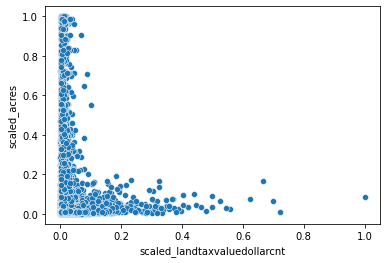

In [8]:
#Explore
sns.scatterplot(x='scaled_landtaxvaluedollarcnt', y='scaled_acres', data=X[0])

In [9]:
# define independent variables for k-means

X = X[0][['scaled_landtaxvaluedollarcnt', 'scaled_acres']]
X.head(3)

,scaled_landtaxvaluedollarcnt,scaled_acres
12248933,0.002751,0.007412
11110824,0.008068,0.263323
11115676,0.007150,0.045871


In [10]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)
#X['cluster'] = kmeans.predict(X)

X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,age,taxrate,acres,cola,hot_month_sale,has_heat,cluster
parcelid,,,,,,,,,,,,,,,,,,
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,46364.0,48.0,1.404779,0.115197,0,0,1,1
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,133300.0,40.0,1.480232,3.398140,0,0,1,0
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,118289.0,13.0,1.477631,0.608563,0,0,1,1
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,59100.0,58.0,1.289512,0.171648,1,0,1,1
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,114896.0,70.0,1.556705,0.134252,0,1,1,1


In [11]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.01336418, 0.16384108],
       [0.01818303, 0.01700239],
       [0.01011152, 0.81296022],
       [0.0094789 , 0.40670009]])

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_landtaxvaluedollarcnt,scaled_acres
0,0.013364,0.163841
1,0.018183,0.017002
2,0.010112,0.812960
3,0.009479,0.406700


Text(0.5, 1.0, 'Clusters of Properties by Land Value and Acres (scaled)')

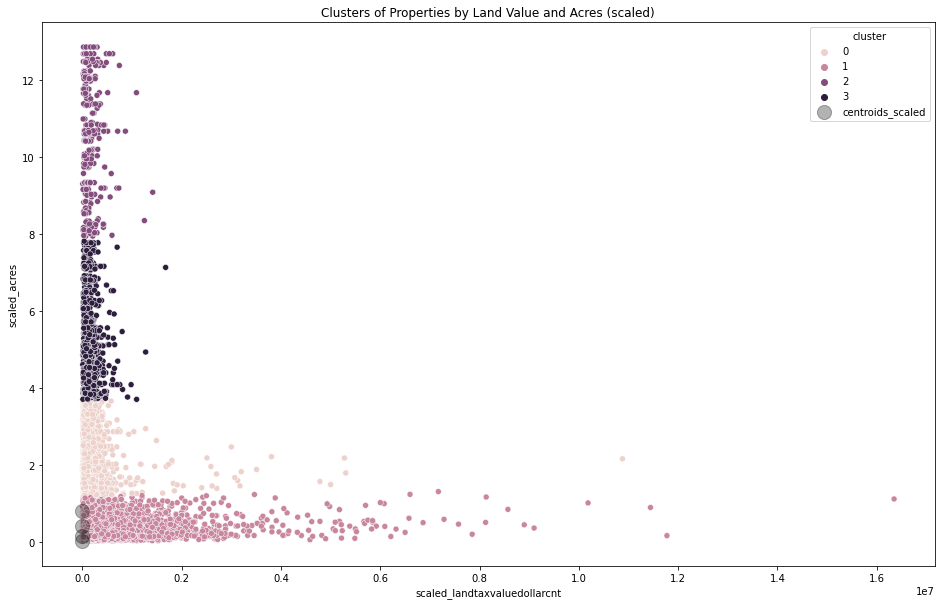

In [13]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='landtaxvaluedollarcnt', y='acres', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='scaled_landtaxvaluedollarcnt', y='scaled_acres', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Land Value and Acres (scaled)')

---

**Cluster on Size of Property Using scaled_buildingqualitytypeid and scaled_age**

In [20]:
# define independent variables for k-means

X = X[0][['scaled_buildingqualitytypeid', 'scaled_age']]
X.head(3)

,scaled_buildingqualitytypeid,scaled_age
12248933,0.636364,0.358779
11110824,0.454545,0.297710
11115676,0.636364,0.091603


In [21]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)
#X['cluster'] = kmeans.predict(X)

X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,age,taxrate,acres,cola,hot_month_sale,has_heat,cluster
parcelid,,,,,,,,,,,,,,,,,,
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,46364.0,48.0,1.404779,0.115197,0,0,1,2
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,133300.0,40.0,1.480232,3.398140,0,0,1,1
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,118289.0,13.0,1.477631,0.608563,0,0,1,1
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,59100.0,58.0,1.289512,0.171648,1,0,1,2
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,114896.0,70.0,1.556705,0.134252,0,1,1,2


In [22]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.38083481, 0.47638878],
       [0.60533254, 0.19498023],
       [0.6399478 , 0.44524838],
       [0.35719424, 0.70678511]])

In [23]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_buildingqualitytypeid,scaled_age
0,0.380835,0.476389
1,0.605333,0.194980
2,0.639948,0.445248
3,0.357194,0.706785


Text(0.5, 1.0, 'Clusters of Properties by Building Quality and Age (scaled)')

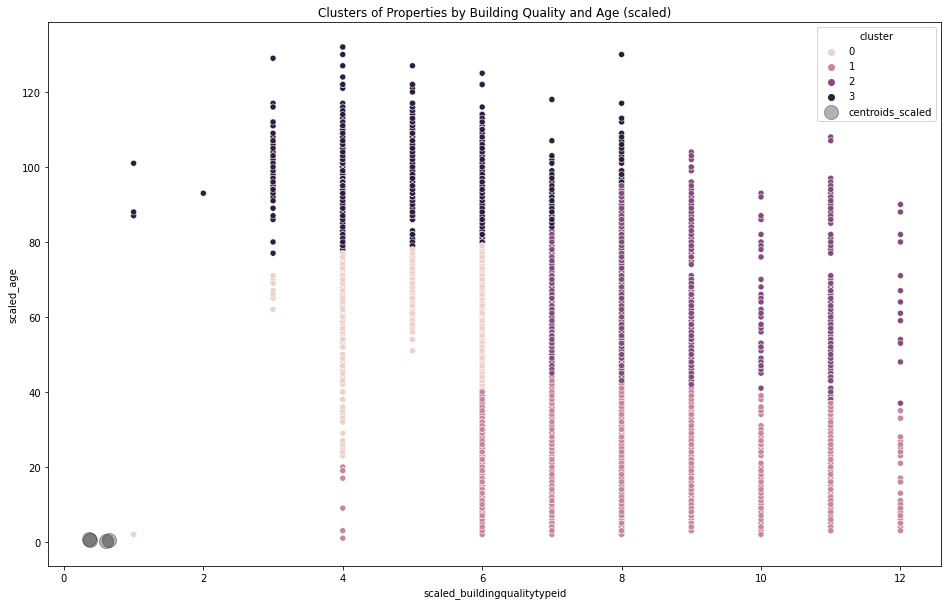

In [26]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='buildingqualitytypeid', y='age', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='scaled_buildingqualitytypeid', y='scaled_age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Building Quality and Age (scaled)')

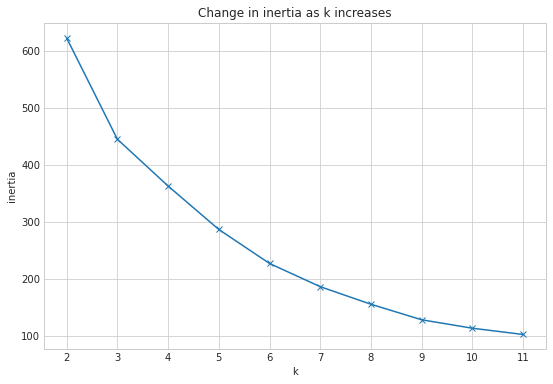

In [29]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [35]:
X.drop(columns={'cluster'}, inplace=True)

---

**Cluster on Size of Property Using scaled_buildingqualitytypeid and scaled_age**

In [36]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)

X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,age,taxrate,acres,cola,hot_month_sale,has_heat,cluster
parcelid,,,,,,,,,,,,,,,,,,
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,46364.0,48.0,1.404779,0.115197,0,0,1,2
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,133300.0,40.0,1.480232,3.398140,0,0,1,1
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,118289.0,13.0,1.477631,0.608563,0,0,1,1
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,59100.0,58.0,1.289512,0.171648,1,0,1,2
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,114896.0,70.0,1.556705,0.134252,0,1,1,2


In [37]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.30731193, 0.58831449],
       [0.61141547, 0.20787125],
       [0.53594745, 0.46654074]])

In [39]:
centroids_scaled

,scaled_buildingqualitytypeid,scaled_age
0,0.380835,0.476389
1,0.605333,0.194980
2,0.639948,0.445248
3,0.357194,0.706785


In [41]:
X.drop(columns={'cluster'}, inplace=True)

In [42]:
X

,scaled_buildingqualitytypeid,scaled_age
12248933,0.636364,0.358779
11110824,0.454545,0.297710
11115676,0.636364,0.091603
11059395,0.636364,0.435115
12363460,0.636364,0.526718
...,...,...
11818806,0.454545,0.259542
11451402,0.636364,0.175573
12852173,0.454545,0.328244
11752192,0.454545,0.709924


In [43]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_buildingqualitytypeid,scaled_age
0,0.307312,0.588314
1,0.611415,0.207871
2,0.535947,0.466541


Text(0.5, 1.0, 'Clusters of Properties by Building Quality and Age (scaled)')

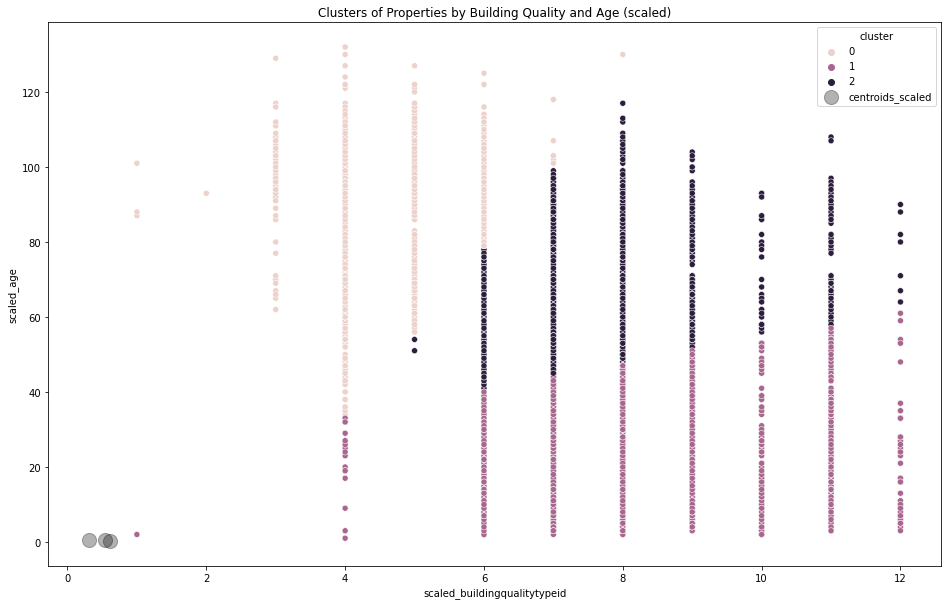

In [44]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='buildingqualitytypeid', y='age', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='scaled_buildingqualitytypeid', y='scaled_age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Building Quality and Age (scaled)')

**Takeaways:**
- Older homes are less likely to have higher building quality types
- Is age of home or building quality type id a better predictor of logerror? Do we need both?
- Would this look different if we binned age?

---